In [21]:
#sum of all coldkeys and a pie chart for each coldkey by alpha (converted into tao

# add your API key, and all of the coldkeys you ish to nevestigate into the array


import requests, json
import pandas as pd
import numpy as np
import decimal
import time
from datetime import datetime, timedelta
from rich import print
import matplotlib.pyplot as plt

api_key=""

headers = {
            "accept": "application/json",
            "Authorization": api_key
        }


coldkeys= [
    "5FyGT3PetK5odMMNRWpdtoANHpV9ChUwqq5B5wiBdC3Z9rfb"
]

In [22]:
balanceData = {}
sum =0
for coldkey in coldkeys:
    url = f"https://api.taostats.io/api/dtao/stake_balance/latest/v1?coldkey={coldkey}&limit=200"
    response = requests.get(url, headers=headers)
    #print(response.text)
    resJson = json.loads(response.text)
    alphas = resJson['data']
    balanceData[coldkey] = {}
    
    for alpha in alphas:
        netuid = alpha['netuid']
        balance_as_tao = float(alpha['balance_as_tao'])/1e9
        sum +=balance_as_tao
        if netuid in balanceData[coldkey]:
            balanceData[coldkey][netuid] += balance_as_tao
        else:
            balanceData[coldkey][netuid] = balance_as_tao
print('sum of all hotkeys', sum)
    

sum of all hotkeys 12616.04245957

In [23]:
print(balanceData)

{
    '5FyGT3PetK5odMMNRWpdtoANHpV9ChUwqq5B5wiBdC3Z9rfb': {
        0: 10158.751421769,
        4: 967.1638448419999,
        8: 204.66376386299999,
        25: 7.379378266,
        37: 1.346120926,
        51: 31.433892831999998,
        58: 1.262402,
        64: 1244.041635072
    }
}

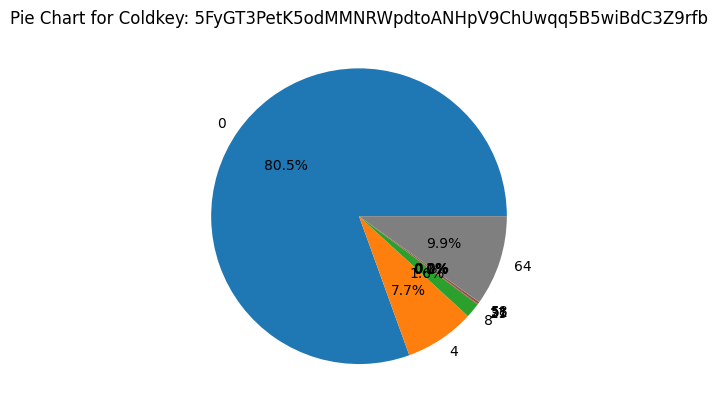

In [24]:
for coldkey, netuids in balanceData.items():
    labels = list(netuids.keys())
    sizes = list(netuids.values())
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.title(f'Pie Chart for Coldkey: {coldkey}')
    plt.show()